<a href="https://colab.research.google.com/github/LittleAri/ALICE/blob/main/ALICE_rCNN_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mask RCNN Tests

Testing [Mask RCNN](https://github.com/matterport/Mask_RCNN) based on this [blog](https://www.analyticsvidhya.com/blog/2019/07/computer-vision-implementing-mask-r-cnn-image-segmentation/) post. 

Using pre-trained weights to segment labels from a sample of ALICE images. 


To run this notebook, download the files in the folder Mask_RCNN_Files in the ALICE repository.

#### Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Installing Packages
Install certain versions of packages.

In [2]:
!pip install tensorflow==1.15.5
!pip install keras==2.3.1
!pip install git+https://www.github.com/keras-team/keras-contrib.git
!pip install numpy==1.21.5

     |████████████████████████████████| 110.5 MB 1.3 kB/s 
     |████████████████████████████████| 20.1 MB 1.3 MB/s 
     |████████████████████████████████| 503 kB 72.3 MB/s 
     |████████████████████████████████| 3.8 MB 50.3 MB/s 
     |████████████████████████████████| 2.9 MB 52.3 MB/s 
     |████████████████████████████████| 50 kB 9.2 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=7eea83b7c6052261de34510615024572b808fa17d7a4d85f1e47787c64118400
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tens

     |████████████████████████████████| 377 kB 7.4 MB/s 
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-p215tat_
  Running command git clone -q https://www.github.com/keras-team/keras-contrib.git /tmp/pip-req-build-p215tat_
  Created wheel for keras-contrib: filename=keras_contrib-2.0.8-py3-none-any.whl size=101077 sha256=8ab9b1cd8839f68abeb8864c235b1144c49f6d20f90514a0583e16d8b75f55ac
  Stored in directory: /tmp/pip-ephem-wheel-cache-1zdi94ba/wheels/bb/1f/f2/b57495012683b6b20bbae94a3915ec79753111452d79886abc
Successfully built keras-contrib
     |████████████████████████████████| 15.7 MB 10.1 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
      Successfully uninstalled numpy-1.18.5
ERROR: pip's dependency resolver does not currently take 

#### Imports

In [2]:
import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt
from google.colab import files
import tqdm
from copy import deepcopy
import warnings
warnings.filterwarnings("ignore")
import config
# Import Mask RCNN
import utils
import model as modellib
import visualize
# Import COCO config
import coco

%matplotlib inline

Using TensorFlow backend.


#### Weights / Model

In [3]:
class InferenceConfig(coco.CocoConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    NUM_CLASSES = 2

config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

In [4]:
# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir=' ', config=config)

# Load weights trained on ALICE data
model.load_weights('drive/My Drive/rCNN/mask_rcnn_label.h5', by_name=True)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead
Instructions for updating:
Use `tf.cast` instead.


#### Prediction Test

In [5]:
# ALICE Class names
class_names = ['BG', 'label']

In [ ]:
file = '013612426_additional_1.JPG'
image = skimage.io.imread("images/"+file)

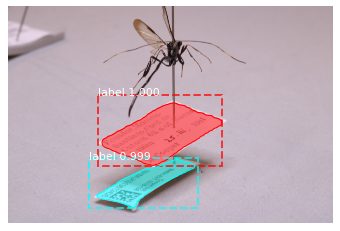

In [ ]:
fig,ax = plt.subplots()
# Run detection
results = model.detect([image], verbose=0)

# Visualize results
r = results[0]

# Note: Ari updated display_instances to include an ax variable.
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'],ax=ax)

In [ ]:
_,_,total_objects = np.shape(r['masks'])
for i in range(0,total_objects):
  nm = file[:-4]+"_"+str(i)+'.npy'
  # Save mask
  np.save('/content/drive/My Drive/rCNN/results/masks/'+nm,r['masks'][:,:,i])
  # Save ROI
  np.save('/content/drive/My Drive/rCNN/results/rois/'+nm,r['rois'][i])
  # Save mask plot
  fig,ax = plt.subplots(figsize=(5,4))
  ax.imshow(image)
  ax.imshow(r['masks'][:,:,i],alpha=0.35)
  ax.axis('off')
  fig.savefig('/content/drive/My Drive/rCNN/results/plots/'+nm[:-3]+'JPG',margin=0.01)
  plt.close()

#### Automated Tests

Test the automated process from a folder of images, "Images". Save the plot of the image with the highlighted objects, and save (and automatically download) the individual masks / ROIs as numpy files.

In [6]:
names = []

img_path = '/content/drive/My Drive/rCNN/Files/test'

for file in os.listdir(img_path):
  names.append(file)

In [ ]:
for file in tqdm.tqdm(names):
  # Load image:
  try:
    image = skimage.io.imread(img_path+'/'+file)
    # CNN segmentation:
    results = model.detect([image], verbose=0)
    r = results[0]
    _,_,total_objects = np.shape(r['masks'])
    for i in range(0,total_objects):
      nm = file[:-4]+"_"+str(i)+'.npy'
      # Save mask
      np.save('/content/drive/My Drive/rCNN/results/masks/'+nm,r['masks'][:,:,i])
      # Save ROI
      np.save('/content/drive/My Drive/rCNN/results/rois/'+nm,r['rois'][i])
      # Save mask plot
      fig,ax = plt.subplots(figsize=(5,4))
      ax.imshow(image)
      ax.imshow(r['masks'][:,:,i],alpha=0.35)
      ax.axis('off')
      fig.savefig('/content/drive/My Drive/rCNN/results/plots/'+nm[:-3]+'JPG',margin=0.01)
      plt.close()
  except:
    print("Error with image: "+file)

 11%|█▏        | 12/105 [04:56<26:59, 17.42s/it]

Error with image: Syrph022_additional_1.JPG


 22%|██▏       | 23/105 [09:39<24:25, 17.87s/it]

Error with image: Sarc041_additional_4.JPG


 30%|██▉       | 31/105 [13:17<31:04, 25.19s/it]